In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import joblib
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('survey_results_public.csv')

df.head()


ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   
3  Colleague;Friend or family member;Other online...   
4  Books / Physical media;Online Courses or Certi...   

                                     LearnCodeOnline  ...        Frequency_1  \
0                                                NaN  ...                NaN   
1  Formal documentation provided by the owner of ...  ...   1-2 times a week   
2  Formal documentation provided by the owner of ...  ...  6-10 times a week   
3  Formal documentation provided by the owner of ...  ...   1-2 times a week   
4  Formal documentation provided by the owner of ...  ...   1-2 times a week   

         Frequency_2       Frequency_3         TimeSearching  \
0                NaN               NaN                   NaN   
1   10+ times a week             Never   15-30 minutes a day   
2  6-10 times a week  3-5 times a week   30-60 minutes a day   
3   10+ times a week  1-2 times a week   15-30 minutes a day   
4   1-2 times a week  3-5 times a week  60-120 minutes a day   

         TimeAnswering                                   ProfessionalTech  \
0                  NaN                                                NaN   
1  15-30 minutes a day  DevOps function;Microservices;Automated testin...   
2  30-60 minutes a day  DevOps function;Microservices;Automated testin...   
3  30-60 minutes a day  Automated testing;Continuous integration (CI) ...   
4  30-60 minutes a day  Microservices;Automated testing;Observability ...   

                                            Industry           SurveyLength  \
0                                                NaN                    NaN   
1  Information Services, IT, Software Development...  Appropriate in length   
2  Information Services, IT, Software Development...  Appropriate in length   
3                                                NaN  Appropriate in length   
4                                              Other  Appropriate in length   

                   SurveyEase ConvertedCompYearly  
0                         NaN                 NaN  
1                        Easy            285000.0  
2              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
df.shape

(89184, 84)

In [ ]:
df.describe()

ResponseId     CompTotal       WorkExp  ConvertedCompYearly
count  89184.000000  4.822500e+04  43579.000000         4.801900e+04
mean   44592.500000  1.036807e+42     11.405126         1.031101e+05
std    25745.347541  2.276847e+44      9.051989         6.814188e+05
min        1.000000  0.000000e+00      0.000000         1.000000e+00
25%    22296.750000  6.300000e+04      5.000000         4.390700e+04
50%    44592.500000  1.150000e+05      9.000000         7.496300e+04
75%    66888.250000  2.300000e+05     16.000000         1.216410e+05
max    89184.000000  5.000000e+46     50.000000         7.435143e+07

In [ ]:
df.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [ ]:
good_features = [feature for feature in df.columns if df[feature].isnull().sum()==0]
print(good_features)

['ResponseId', 'Q120', 'MainBranch', 'Age']


In [ ]:
feature_uniq = {feature:len(df[feature].unique()) for feature in df.columns }
for feature in feature_uniq.keys():
    print(f'{feature} : {feature_uniq[feature]}')

ResponseId : 89184
Q120 : 1
MainBranch : 6
Age : 8
Employment : 107
RemoteWork : 4
CodingActivities : 117
EdLevel : 9
LearnCode : 791
LearnCodeOnline : 7941
LearnCodeCoursesCert : 211
YearsCode : 53
YearsCodePro : 53
DevType : 34
OrgSize : 11
PurchaseInfluence : 4
TechList : 4
BuyNewTool : 232
Country : 186
Currency : 145
CompTotal : 3829
LanguageHaveWorkedWith : 32642
LanguageWantToWorkWith : 29603
DatabaseHaveWorkedWith : 11097
DatabaseWantToWorkWith : 10486
PlatformHaveWorkedWith : 5921
PlatformWantToWorkWith : 4964
WebframeHaveWorkedWith : 15145
WebframeWantToWorkWith : 14621
MiscTechHaveWorkedWith : 10323
MiscTechWantToWorkWith : 11776
ToolsTechHaveWorkedWith : 33134
ToolsTechWantToWorkWith : 27457
NEWCollabToolsHaveWorkedWith : 21263
NEWCollabToolsWantToWorkWith : 13660
OpSysPersonal use : 3051
OpSysProfessional use : 2471
OfficeStackAsyncHaveWorkedWith : 6259
OfficeStackAsyncWantToWorkWith : 3755
OfficeStackSyncHaveWorkedWith : 6926
OfficeStackSyncWantToWorkWith : 4079
AISearchH

In [ ]:
print(df['YearsCode'].unique())

[nan '18' '27' '12' '6' '21' '4' '5' '20' '14' '10' '15' '11' '3' '24' '8'
 '13' 'Less than 1 year' '16' '33' '22' '30' '32' '7' '35' '28' '40' '17'
 '29' '19' 'More than 50 years' '9' '38' '26' '34' '25' '2' '45' '23' '31'
 '43' '1' '48' '41' '50' '39' '42' '37' '36' '44' '46' '49' '47']


In [ ]:
df['YearsCodePro'].unique()

array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

In [ ]:
comparison = df['YearsCode'] == df['YearsCodePro']
columns_equal = comparison.all()

print(f"Are 'Column1' and 'Column2' the same? {columns_equal}")

Are 'Column1' and 'Column2' the same? False


In [ ]:
df['WorkExp'].unique()

array([nan, 10., 23.,  7.,  6., 22.,  4.,  5.,  3.,  9., 15., 14., 18.,
       13., 39.,  2., 28., 12., 17., 25., 11., 16., 30., 20., 24., 19.,
        1.,  8., 26., 38., 27., 32., 21., 40.,  0., 34., 35., 29., 33.,
       37., 36., 31., 48., 45., 42., 43., 44., 50., 41., 46., 47., 49.])

In [ ]:
df['CompTotal'].unique()

array([      nan,   285000.,   250000., ..., 62400000.,   106905.,
         602640.])

In [ ]:
df['RemoteWork'].unique()

array([nan, 'Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [ ]:
df['MainBranch'].unique()

array(['None of these', 'I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I code primarily as a hobby', 'I am learning to code',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [ ]:
df['EdLevel'].unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [ ]:
df['LanguageHaveWorkedWith'].unique()

array([nan, 'HTML/CSS;JavaScript;Python', 'Bash/Shell (all shells);Go',
       ..., 'Bash/Shell (all shells);C#;C++;Cobol;Groovy;PHP;PowerShell',
       'Assembly;Bash/Shell (all shells);C;C#;Python;Rust;SQL',
       'Bash/Shell (all shells);C#;HTML/CSS;Java;JavaScript;Lua;Objective-C;PowerShell;Python;Solidity;SQL'],
      dtype=object)

In [ ]:
df['TechList'].unique()

array([nan, 'Investigate', 'Given a list', 'Other'], dtype=object)

In [ ]:
df['PurchaseInfluence'].unique()

array([nan, 'I have a great deal of influence', 'I have some influence',
       'I have little or no influence'], dtype=object)

In [ ]:
df['Industry'].unique()

array([nan,
       'Information Services, IT, Software Development, or other Technology',
       'Other', 'Financial Services',
       'Manufacturing, Transportation, or Supply Chain',
       'Retail and Consumer Services', 'Higher Education',
       'Legal Services', 'Insurance', 'Healthcare', 'Oil & Gas',
       'Wholesale', 'Advertising Services'], dtype=object)

In [ ]:
df['OrgSize'].unique()

array([nan, '2 to 9 employees', '5,000 to 9,999 employees',
       '100 to 499 employees', '20 to 99 employees',
       '1,000 to 4,999 employees', '10 to 19 employees',
       '10,000 or more employees', '500 to 999 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       'I don’t know'], dtype=object)

In [ ]:
df['Country'].unique()

array([nan, 'United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'India', 'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Poland', 'Lebanon', 'Lithuania',
       'Serbia', 'Cyprus', 'China', 'Bahrain',
       'Iran, Islamic Republic of...', 'Pakistan', 'Egypt',
       'Russian Federation', 'Turkey', 'Slovakia', 'Latvia', 'Greece',
       'Austria', 'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Nepal', 'Slovenia', 'Romania', 'Luxembourg', 'Indonesia',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Kenya',
       'Nomadic', 'Dominican Republic', 'Morocco', 'Uzbekistan',
       'Belarus', 'Isle of Man', 'Estonia', 'Bulgaria',
       '

In [ ]:
df['Employment'].unique()

array([nan, 'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time',
       'Not employed, but looking for work;Student, full-time',
       'Employed, part-time;Student, part-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time', 'I prefer not to say',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Not employed, but looking for work;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Retired', 'Employed, full-time;Student, full-time',
       'Student, full-time;Student, part-time',
       '

In [ ]:
df['DevType'].unique()

array([nan, 'Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional', 'Educator',
       'Research & Development role', 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Student',
       'Engineer, data', 'Hardware Engineer', 'Product manager',
       'Academic researcher', 'Developer, game or graphics',
       'Cloud infrastructure engineer', 'Engineering manager',
       'Developer Experience', 'Project manager', 'DevOps specialist',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Scientist', 'Marketing or sales professional'], dtype=object)

In [ ]:
df['Currency'].unique()

array([nan, 'USD\tUnited States dollar', 'PHP\tPhilippine peso',
       'GBP\tPound sterling', 'EUR European Euro',
       'AUD\tAustralian dollar', 'SEK\tSwedish krona',
       'AMD\tArmenian dram', 'ZAR\tSouth African rand',
       'BRL\tBrazilian real', 'BDT\tBangladeshi taka',
       'CAD\tCanadian dollar', 'CHF\tSwiss franc',
       'LKR\tSri Lankan rupee', 'INR\tIndian rupee', 'IRR\tIranian rial',
       'PLN\tPolish zloty', 'RUB\tRussian ruble', 'TRY\tTurkish lira',
       'DKK\tDanish krone', 'ILS\tIsraeli new shekel',
       'HUF\tHungarian forint', 'SGD\tSingapore dollar',
       'AED United Arab Emirates dirham', 'NOK\tNorwegian krone',
       'RSD\tSerbian dinar', 'CZK\tCzech koruna', 'NPR\tNepalese rupee',
       'RON\tRomanian leu', 'CNY\tChinese Yuan Renminbi',
       'SAR\tSaudi Arabian riyal', 'TND\tTunisian dinar',
       'KRW\tSouth Korean won', 'VND\tVietnamese dong',
       'UAH\tUkrainian hryvnia', 'DOP\tDominican peso',
       'EGP\tEgyptian pound', 'UZS\tUzbekis

In [ ]:
df_new = df[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly', 'Age', 'YearsCode', 'WorkExp', 'MainBranch', 'RemoteWork', 'TechList', 'DevType', 'CompTotal', 'Industry', 'OrgSize', 'LanguageHaveWorkedWith' ]]


In [ ]:
df_new = df_new.rename({'ConvertedCompYearly':'Salary'},axis=1)

In [ ]:
df_new = df_new[df_new['Salary'].notnull()]
df_new.head()

Country  \
1                           United States of America   
2                           United States of America   
3                           United States of America   
4                                        Philippines   
5  United Kingdom of Great Britain and Northern I...   

                                             EdLevel YearsCodePro  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)            9   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)           23   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)            4   
5  Some college/university study without earning ...           21   

                                          Employment    Salary  \
1                                Employed, full-time  285000.0   
2                                Employed, full-time  250000.0   
3                                Employed, full-time  156000.0   
4  Employed, full-time;Independent contractor, fr...   23456.0   
5                                Employed, full-time   96828.0   

               Age YearsCode  WorkExp                      MainBranch  \
1  25-34 years old        18     10.0  I am a developer by profession   
2  45-54 years old        27     23.0  I am a developer by profession   
3  25-34 years old        12      7.0  I am a developer by profession   
4  25-34 years old         6      6.0  I am a developer by profession   
5  35-44 years old        21     22.0  I am a developer by profession   

                             RemoteWork      TechList  \
1                                Remote   Investigate   
2  Hybrid (some remote, some in-person)  Given a list   
3  Hybrid (some remote, some in-person)   Investigate   
4                                Remote   Investigate   
5                                Remote           NaN   

                                DevType  CompTotal  \
1  Senior Executive (C-Suite, VP, etc.)   285000.0   
2                   Developer, back-end   250000.0   
3                  Developer, front-end   156000.0   
4                 Developer, full-stack  1320000.0   
5                   Developer, back-end    78000.0   

                                            Industry  \
1  Information Services, IT, Software Development...   
2  Information Services, IT, Software Development...   
3                                                NaN   
4                                              Other   
5                                              Other   

                    OrgSize                             LanguageHaveWorkedWith  
1          2 to 9 employees                         HTML/CSS;JavaScript;Python  
2  5,000 to 9,999 employees                         Bash/Shell (all shells);Go  
3      100 to 499 employees  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...  
4        20 to 99 employees                     HTML/CSS;JavaScript;TypeScript  
5      100 to 499 employees  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...

In [ ]:
df_new.shape

(48019, 16)

In [ ]:
def split_multicolumn(col_series):
    # Create a DataFrame from the Series
    result_df = pd.DataFrame(index=col_series.index)
    options = set()

    for idx, value in col_series.dropna().items():
        if isinstance(value, str):
            for option in value.split(';'):
                option = option.strip()
                if option not in options:
                    options.add(option)
                    result_df[option] = 0
                result_df.at[idx, option] = 1
        else:
            # Handle non-string values (e.g., float or NaN)
            print(f"Warning: Non-string value detected at index {idx}.")

    # Fill NaNs with 0 for consistency
    result_df.fillna(0, inplace=True)

    return result_df

In [ ]:
encoded_languages = split_multicolumn(df_new['LanguageHaveWorkedWith'])
encoded_languages

HTML/CSS  JavaScript  Python  Bash/Shell (all shells)  Go  PHP  Ruby  \
1             1           1       1                        0   0    0     0   
2             0           0       0                        1   1    0     0   
3             1           1       0                        1   0    1     1   
4             1           1       0                        0   0    0     0   
5             1           1       0                        1   0    0     1   
...         ...         ...     ...                      ...  ..  ...   ...   
89162         0           0       0                        0   0    0     0   
89166         0           1       0                        1   0    0     0   
89167         1           1       0                        0   0    0     0   
89170         1           1       0                        0   0    0     0   
89171         0           1       0                        0   0    0     0   

       SQL  TypeScript  Ada  ...  Cobol  Fortran  Julia  Prolog  Apex  \
1        0           0    0  ...      0        0      0       0     0   
2        0           0    0  ...      0        0      0       0     0   
3        1           1    0  ...      0        0      0       0     0   
4        0           1    0  ...      0        0      0       0     0   
5        1           1    0  ...      0        0      0       0     0   
...    ...         ...  ...  ...    ...      ...    ...     ...   ...   
89162    0           0    0  ...      0        0      0       0     0   
89166    0           1    0  ...      0        0      0       0     0   
89167    0           1    0  ...      0        0      0       0     0   
89170    1           1    0  ...      0        0      0       0     0   
89171    0           1    0  ...      0        0      0       0     0   

       Crystal  SAS  Erlang  Nim  Flow  
1            0    0       0    0     0  
2            0    0       0    0     0  
3            0    0       0    0     0  
4            0    0       0    0     0  
5            0    0       0    0     0  
...        ...  ...     ...  ...   ...  
89162        0    0       0    0     0  
89166        0    1       0    0     0  
89167        0    0       0    0     0  
89170        0    0       0    0     0  
89171        0    0       0    0     0  

[48019 rows x 51 columns]

In [ ]:
df_new = df_new.drop(columns=['LanguageHaveWorkedWith'])

df_new = pd.concat([df_new, encoded_languages], axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  48019 non-null  object 
 1   EdLevel                  48019 non-null  object 
 2   YearsCodePro             47825 non-null  object 
 3   Employment               48007 non-null  object 
 4   Salary                   48019 non-null  float64
 5   Age                      48019 non-null  object 
 6   YearsCode                47950 non-null  object 
 7   WorkExp                  32638 non-null  float64
 8   MainBranch               48019 non-null  object 
 9   RemoteWork               47940 non-null  object 
 10  TechList                 30580 non-null  object 
 11  DevType                  47904 non-null  object 
 12  CompTotal                48019 non-null  float64
 13  Industry                 27747 non-null  object 
 14  OrgSize                  47

In [ ]:
df_new.isnull().sum()

Country           0
EdLevel           0
YearsCodePro    194
Employment       12
Salary            0
               ... 
Crystal           0
SAS               0
Erlang            0
Nim               0
Flow              0
Length: 66, dtype: int64

In [ ]:
df_new = df_new.dropna()
df_new.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
               ..
Crystal         0
SAS             0
Erlang          0
Nim             0
Flow            0
Length: 66, dtype: int64

In [ ]:
#There are a lot of countries with a very small fraction of data
# We have to group them together for better training
df_new['Country'].value_counts()

Country
United States of America                                4324
Germany                                                 1632
United Kingdom of Great Britain and Northern Ireland    1266
Canada                                                   767
India                                                    675
                                                        ... 
Belize                                                     1
Lesotho                                                    1
Guyana                                                     1
Angola                                                     1
Senegal                                                    1
Name: count, Length: 149, dtype: int64

In [ ]:
def shorten_categories(categories,cutoff):
    categories_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categories_map[categories.index[i]] = categories.index[i]
        else :
            categories_map[categories.index[i]] = 'Other'
    return categories_map

In [ ]:
country_map = shorten_categories(df_new.Country.value_counts(),400)
df_new['Country'] = df_new['Country'].map(country_map)
df_new.Country.value_counts()

Country
Other                                                   6522
United States of America                                4324
Germany                                                 1632
United Kingdom of Great Britain and Northern Ireland    1266
Canada                                                   767
India                                                    675
France                                                   568
Netherlands                                              503
Poland                                                   448
Brazil                                                   429
Australia                                                420
Name: count, dtype: int64

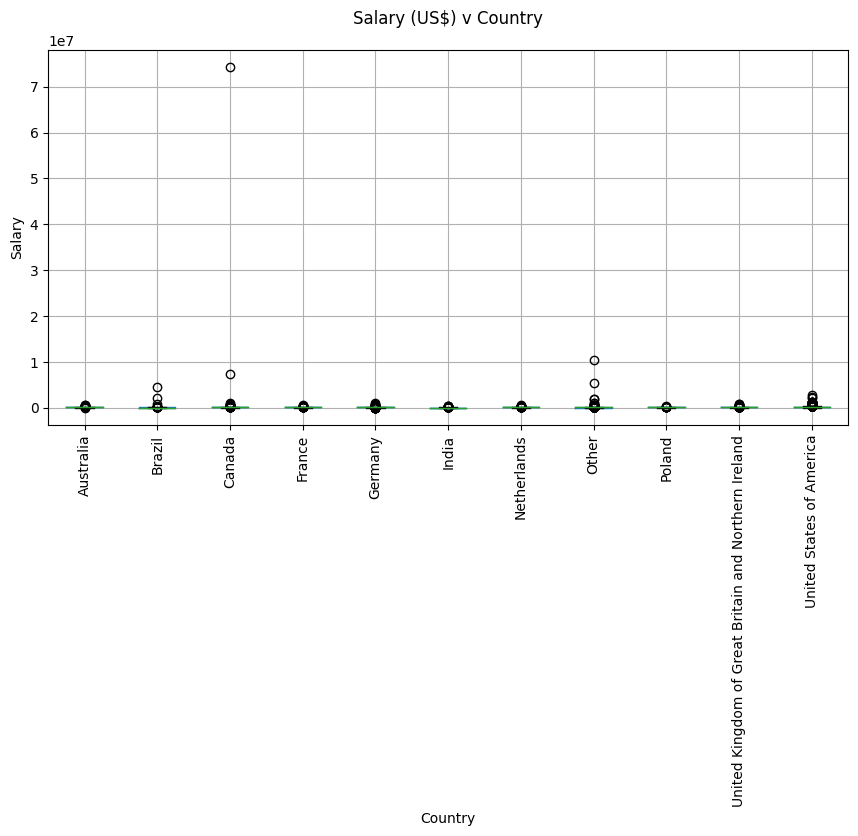

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
df_new.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Clearly some countries have huge outliers, we must remove them
df_new = df_new[df_new['Salary'] <= 150000]
df_new = df_new[df_new['Salary'] >= 10000]
df_new = df_new[df_new['Country'] != 'Other']

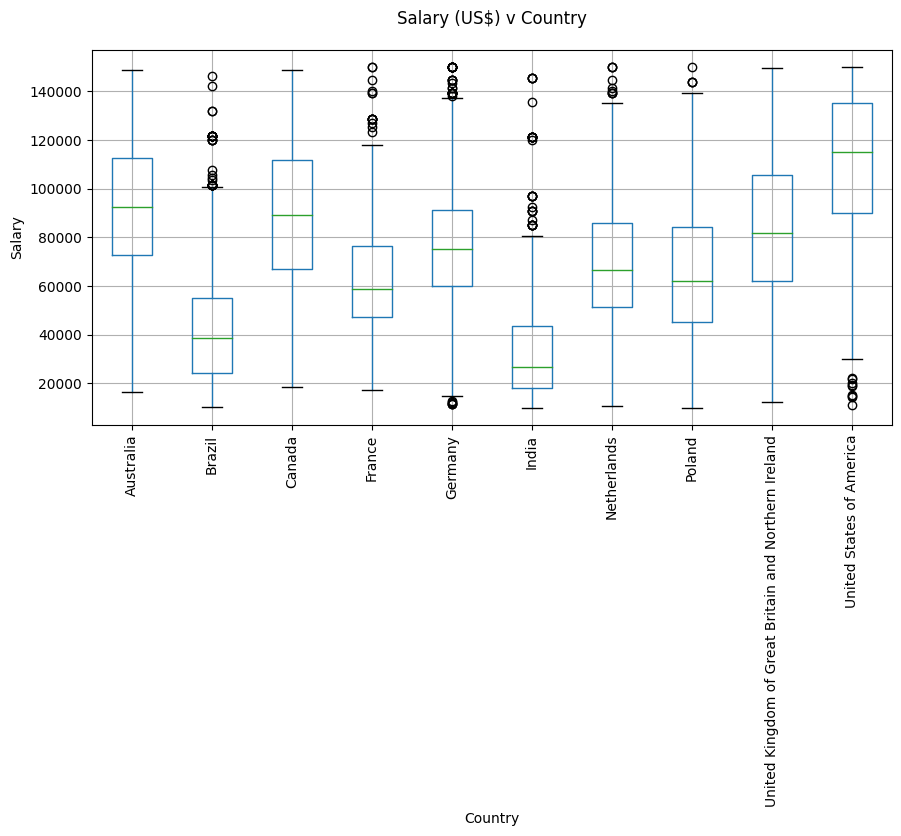

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
df_new.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_new['YearsCodePro'].unique()

array(['3', '9', '10', '14', '6', '2', '7', '15', '5', '8', '25', '38',
       '4', '29', '21', '12', '13', '20', '11', 'Less than 1 year', '17',
       '37', '31', '23', '19', '30', '36', '22', '34', '40', '26', '27',
       '18', '16', '28', '1', '24', '35', '32', '33', '41', '46',
       'More than 50 years', '43', '39', '42', '48', '50', '44', '45',
       '49'], dtype=object)

In [ ]:
df_new['YearsCode'].unique()

array(['5', '10', '15', '24', '6', '3', '33', '12', '7', '11', '9', '31',
       '43', '30', '22', '27', '21', '32', '13', '8', '25', '16', '42',
       '20', '39', '35', '26', '17', '19', '40', '38', '4', '23', '14',
       '44', '28', '18', '37', '45', '29', '41', '50', '34', '2', '36',
       'More than 50 years', '1', '48', 'Less than 1 year', '49', '47',
       '46'], dtype=object)

In [ ]:
def clean_YearsCodePro(x):
    if x == 'More than 50 years':
        return 51
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [ ]:
df_new['YearsCodePro'] = df_new['YearsCodePro'].apply(clean_YearsCodePro)

In [ ]:
df_new['YearsCode'] = df_new['YearsCode'].apply(clean_YearsCodePro)

In [ ]:
df_new['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'Something else',
       'Primary/elementary school'], dtype=object)

In [ ]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

In [ ]:
df_new['EdLevel'] = df_new['EdLevel'].apply(clean_education)

In [ ]:
df_new['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [ ]:
def remote_work_process(val):
    if val == 'Hybrid (some remote, some in-person)':
        return "Hybrid"
    elif val == 'Remote':
        return "Remote"
    else:
        return "Person"

In [ ]:
df_new['RemoteWork'] = df_new['RemoteWork'].apply(remote_work_process)

In [ ]:
df_new['RemoteWork'].unique()

array(['Remote', 'Hybrid', 'Person'], dtype=object)

In [ ]:
label_encode_cols = ['Country', 'EdLevel', 'Employment', 'RemoteWork', 'MainBranch', 'OrgSize']

In [ ]:
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col].astype(str))
    label_encoders[col] = le

In [ ]:
one_hot_encode_cols = ['DevType', 'Industry', 'TechList']

In [ ]:
df_new = pd.get_dummies(df_new, columns=one_hot_encode_cols, drop_first=True)

In [ ]:
df_new

Country  EdLevel  YearsCodePro  Employment    Salary              Age  \
7            9        0           3.0           0   80000.0  25-34 years old   
12           9        0           9.0           0   75000.0  25-34 years old   
15           4        2          10.0           0  107090.0  35-44 years old   
19           4        1          14.0           0   75010.0  35-44 years old   
20           8        0           6.0           0   60828.0  25-34 years old   
...        ...      ...           ...         ...       ...              ...   
89105        5        0           2.0           0   14540.0  18-24 years old   
89143        9        0           9.0           0   90000.0  25-34 years old   
89145        9        0          12.0           0   45000.0  35-44 years old   
89154        9        0           8.0           0   75000.0  35-44 years old   
89162        1        2          24.0           0   50719.0  35-44 years old   

       YearsCode  WorkExp  MainBranch  RemoteWork  ...  \
7            5.0      5.0           0           2  ...   
12          10.0      9.0           0           2  ...   
15          15.0     15.0           0           0  ...   
19          24.0     14.0           0           0  ...   
20           6.0      6.0           0           2  ...   
...          ...      ...         ...         ...  ...   
89105        8.0      2.0           0           2  ...   
89143       12.0      9.0           0           1  ...   
89145       23.0     15.0           1           1  ...   
89154       20.0      8.0           0           0  ...   
89162       30.0     25.0           0           2  ...   

       Industry_Information Services, IT, Software Development, or other Technology  \
7                                                  False                              
12                                                 False                              
15                                                 False                              
19                                                  True                              
20                                                 False                              
...                                                  ...                              
89105                                               True                              
89143                                               True                              
89145                                              False                              
89154                                               True                              
89162                                               True                              

       Industry_Insurance  Industry_Legal Services  \
7                   False                    False   
12                  False                    False   
15                  False                    False   
19                  False                    False   
20                  False                    False   
...                   ...                      ...   
89105               False                    False   
89143               False                    False   
89145               False                    False   
89154               False                    False   
89162               False                    False   

       Industry_Manufacturing, Transportation, or Supply Chain  \
7                                                  False         
12                                                 False         
15                                                  True         
19                                                 False         
20                                                 False         
...                                                  ...         
89105                                              False         
89143                                              False         
89145                                              False     

In [ ]:
age_map = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7
}
# Apply the mapping
df_new['Age'] = df_new['Age'].replace(age_map)

# Convert to numeric and handle errors
df_new['Age'] = pd.to_numeric(df_new['Age'], errors='coerce')

# Print unique values to verify
print(df_new['Age'].unique())

[ 3.  4.  6.  2.  5.  7. nan  1.]


In [ ]:
df_new.dropna(subset=['Age'], inplace=True)

# Fill missing values in numerical columns with the median
df_new['Age'] = df_new['Age'].fillna(df_new['Age'].median())

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
imputer = SimpleImputer(strategy='median')
df_new['CompTotal'] = imputer.fit_transform(df_new[['CompTotal']])

In [ ]:
scaler = StandardScaler()
df_new['CompTotal'] = scaler.fit_transform(df_new[['CompTotal']])

In [ ]:
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

# # Apply the preprocessing to the numeric_cols including CompTotal
# df_new[CompTotal] = numeric_transformer.fit_transform(df_new[CompTotal])

In [ ]:
df_new

Country  EdLevel  YearsCodePro  Employment    Salary  Age  YearsCode  \
7            9        0           3.0           0   80000.0  3.0        5.0   
12           9        0           9.0           0   75000.0  3.0       10.0   
15           4        2          10.0           0  107090.0  4.0       15.0   
19           4        1          14.0           0   75010.0  4.0       24.0   
20           8        0           6.0           0   60828.0  3.0        6.0   
...        ...      ...           ...         ...       ...  ...        ...   
89105        5        0           2.0           0   14540.0  2.0        8.0   
89143        9        0           9.0           0   90000.0  3.0       12.0   
89145        9        0          12.0           0   45000.0  4.0       23.0   
89154        9        0           8.0           0   75000.0  4.0       20.0   
89162        1        2          24.0           0   50719.0  4.0       30.0   

       WorkExp  MainBranch  RemoteWork  ...  \
7          5.0           0           2  ...   
12         9.0           0           2  ...   
15        15.0           0           0  ...   
19        14.0           0           0  ...   
20         6.0           0           2  ...   
...        ...         ...         ...  ...   
89105      2.0           0           2  ...   
89143      9.0           0           1  ...   
89145     15.0           1           1  ...   
89154      8.0           0           0  ...   
89162     25.0           0           2  ...   

       Industry_Information Services, IT, Software Development, or other Technology  \
7                                                  False                              
12                                                 False                              
15                                                 False                              
19                                                  True                              
20                                                 False                              
...                                                  ...                              
89105                                               True                              
89143                                               True                              
89145                                              False                              
89154                                               True                              
89162                                               True                              

       Industry_Insurance  Industry_Legal Services  \
7                   False                    False   
12                  False                    False   
15                  False                    False   
19                  False                    False   
20                  False                    False   
...                   ...                      ...   
89105               False                    False   
89143               False                    False   
89145               False                    False   
89154               False                    False   
89162               False                    False   

       Industry_Manufacturing, Transportation, or Supply Chain  \
7                                                  False         
12                                                 False         
15                                                  True         
19                                                 False         
20                                                 False         
...                                                  ...         
89105                                              False         
89143                                              False         
89145                                              False         
89154                                              False         
89162                                              False         

      

In [ ]:
correlation_matrix = df_new.corr()

In [ ]:
correlation_matrix

Country   EdLevel  YearsCodePro  \
Country                                1.000000 -0.097948     -0.001593   
EdLevel                               -0.097948  1.000000      0.070545   
YearsCodePro                          -0.001593  0.070545      1.000000   
Employment                            -0.041843  0.044262      0.089962   
Salary                                 0.327332 -0.024360      0.304079   
...                                         ...       ...           ...   
Industry_Other                         0.040747  0.014240     -0.021636   
Industry_Retail and Consumer Services  0.031028 -0.033277      0.001194   
Industry_Wholesale                     0.007543  0.010618      0.013879   
TechList_Investigate                  -0.020973  0.011745      0.016958   
TechList_Other                         0.006525 -0.005304      0.027706   

                                       Employment    Salary       Age  \
Country                                 -0.041843  0.327332  0.032456   
EdLevel                                  0.044262 -0.024360  0.129968   
YearsCodePro                             0.089962  0.304079  0.818075   
Employment                               1.000000 -0.043758  0.070494   
Salary                                  -0.043758  1.000000  0.301251   
...                                           ...       ...       ...   
Industry_Other                          -0.022397  0.033344 -0.003708   
Industry_Retail and Consumer Services   -0.017261  0.033378  0.004433   
Industry_Wholesale                      -0.000301 -0.007586  0.015980   
TechList_Investigate                     0.021664  0.017959  0.002963   
TechList_Other                           0.003929 -0.000540  0.025604   

                                       YearsCode   WorkExp  MainBranch  \
Country                                -0.004206  0.020481    0.010109   
EdLevel                                 0.123488  0.073740    0.108753   
YearsCodePro                            0.909904  0.930767   -0.001654   
Employment                              0.077637  0.091680   -0.015784   
Salary                                  0.288876  0.311433   -0.015967   
...                                          ...       ...         ...   
Industry_Other                         -0.013603 -0.014280    0.013012   
Industry_Retail and Consumer Services  -0.011168  0.000710   -0.012662   
Industry_Wholesale                      0.011605  0.014156   -0.010587   
TechList_Investigate                    0.021141  0.011809   -0.012884   
TechList_Other                          0.025167  0.034396    0.000633   

                                       RemoteWork  ...  \
Country                                  0.075177  ...   
EdLevel                                 -0.077792  ...   
YearsCodePro                             0.035823  ...   
Employment                               0.091277  ...   
Salary                                   0.121003  ...   
...                                           ...  ...   
Industry_Other                          -0.007787  ...   
Industry_Retail and Consumer Services    0.007350  ...   
Industry_Wholesale                      -0.008288  ...   
TechList_Investigate                     0.010416  ...   
TechList_Other                          -0.016575  ...   

                                       Industry_Information Services, IT, Software Development, or other Technology  \
Country                                                                        -0.117662                              
EdLevel                                                                         0.009585                              
YearsCodePro                                                                    0.006299                              
Employment                                                                      0.069194                              
Salary                                                                         -0

In [ ]:
target_corr = correlation_matrix['Salary'].sort_values(ascending=False)

In [ ]:
target_corr

Salary                                                                          1.000000
Country                                                                         0.327332
WorkExp                                                                         0.311433
YearsCodePro                                                                    0.304079
Age                                                                             0.301251
                                                                                  ...   
HTML/CSS                                                                       -0.052718
Dart                                                                           -0.058211
PHP                                                                            -0.114246
Industry_Information Services, IT, Software Development, or other Technology   -0.117665
CompTotal                                                                      -0.126041
Name: Salary, Length: 108, dtype: float64

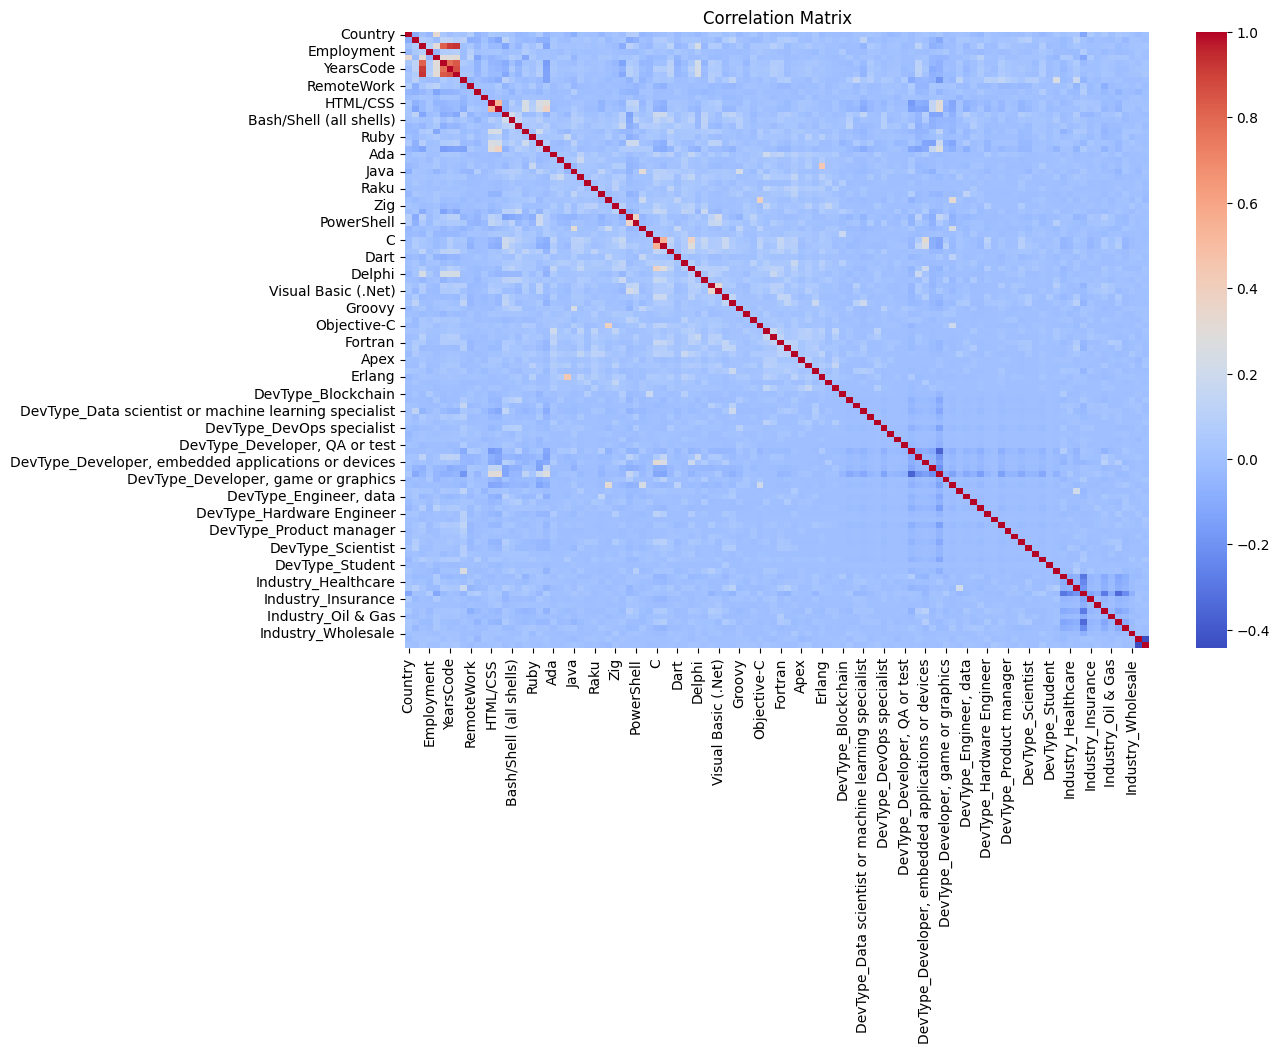

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

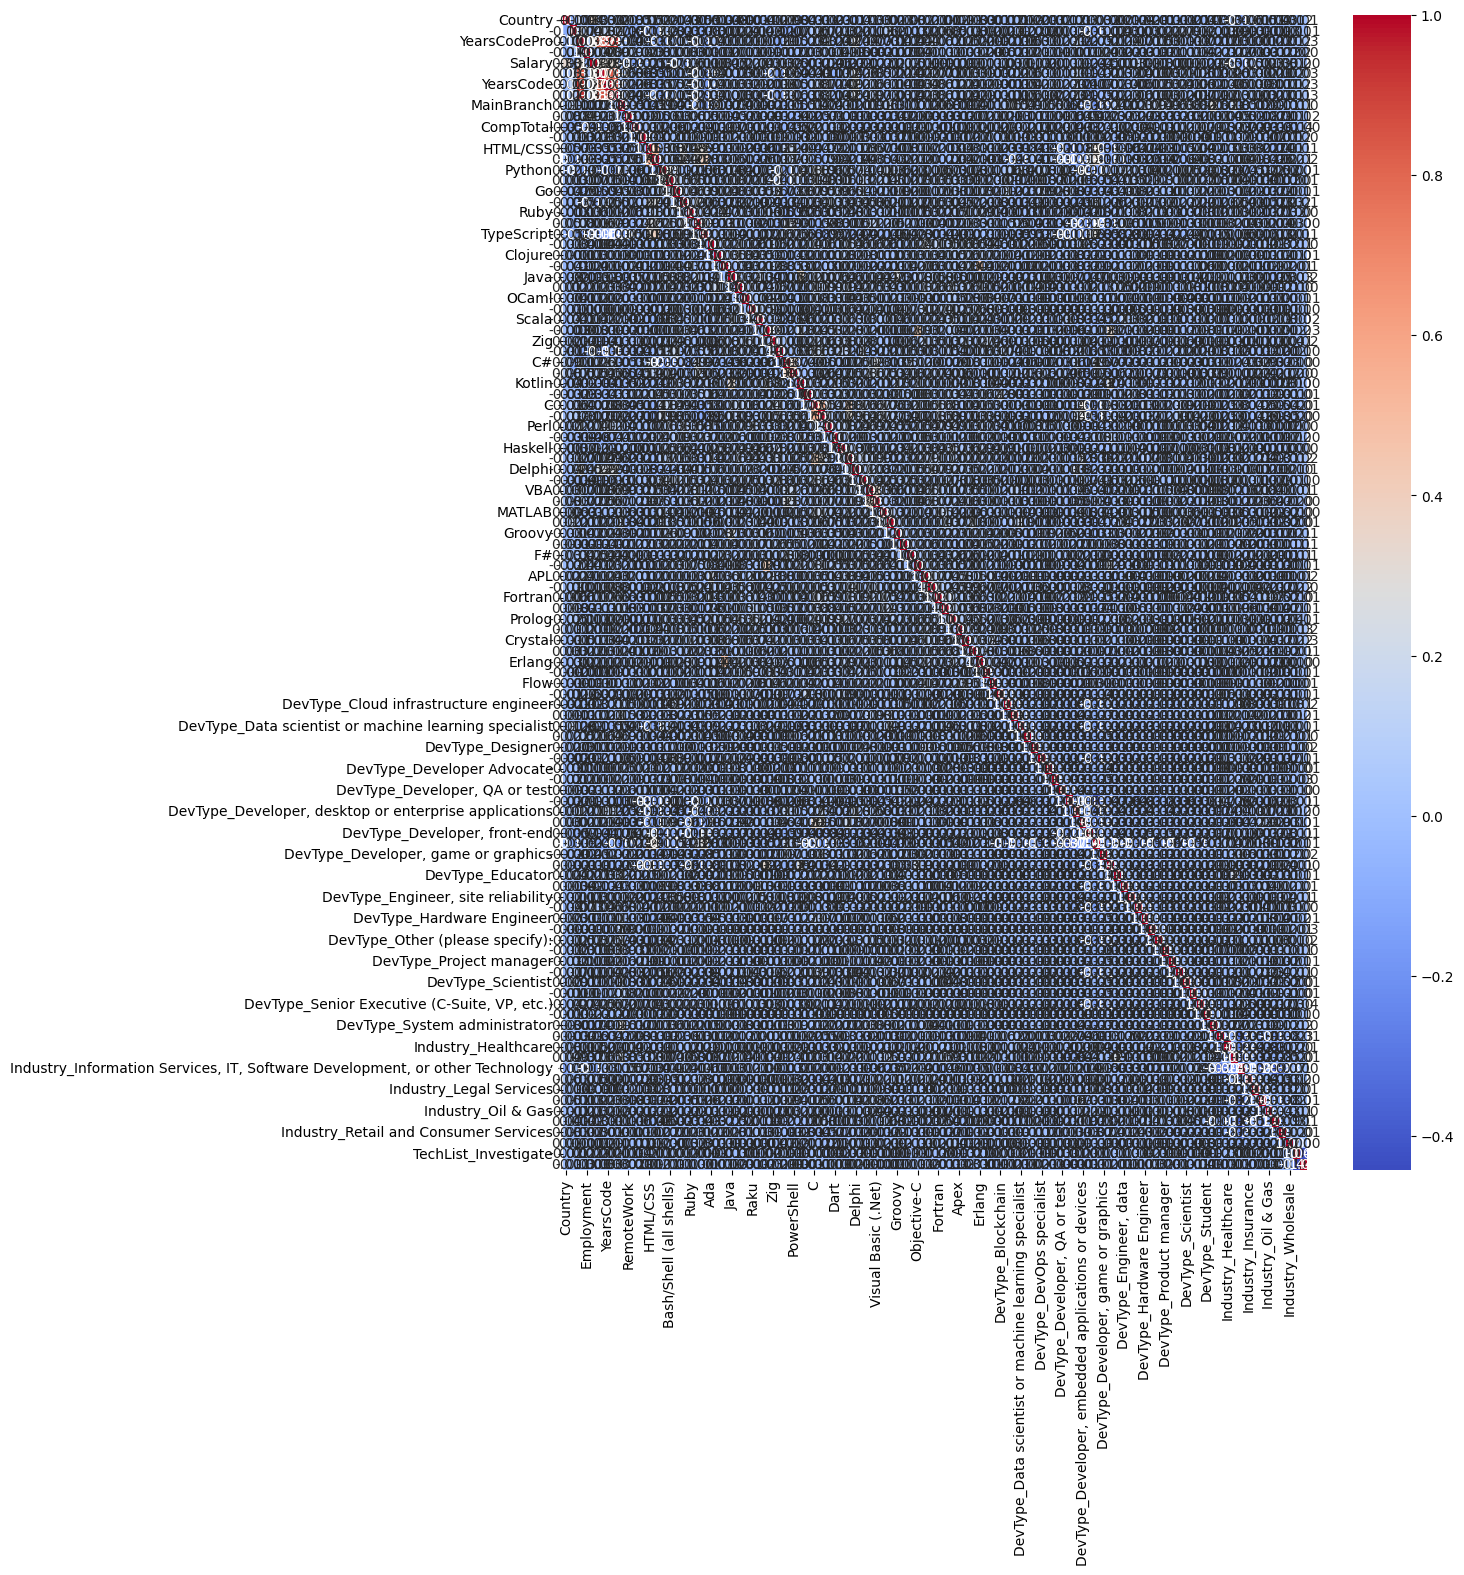

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

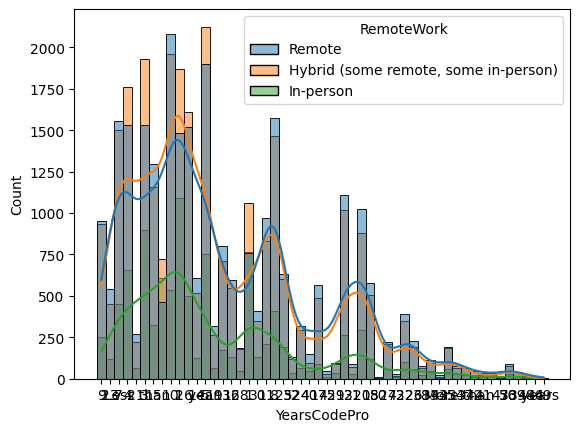

In [ ]:
sns.histplot(data=df, x="YearsCodePro", hue="RemoteWork", kde=True, bins=30)
plt.show()

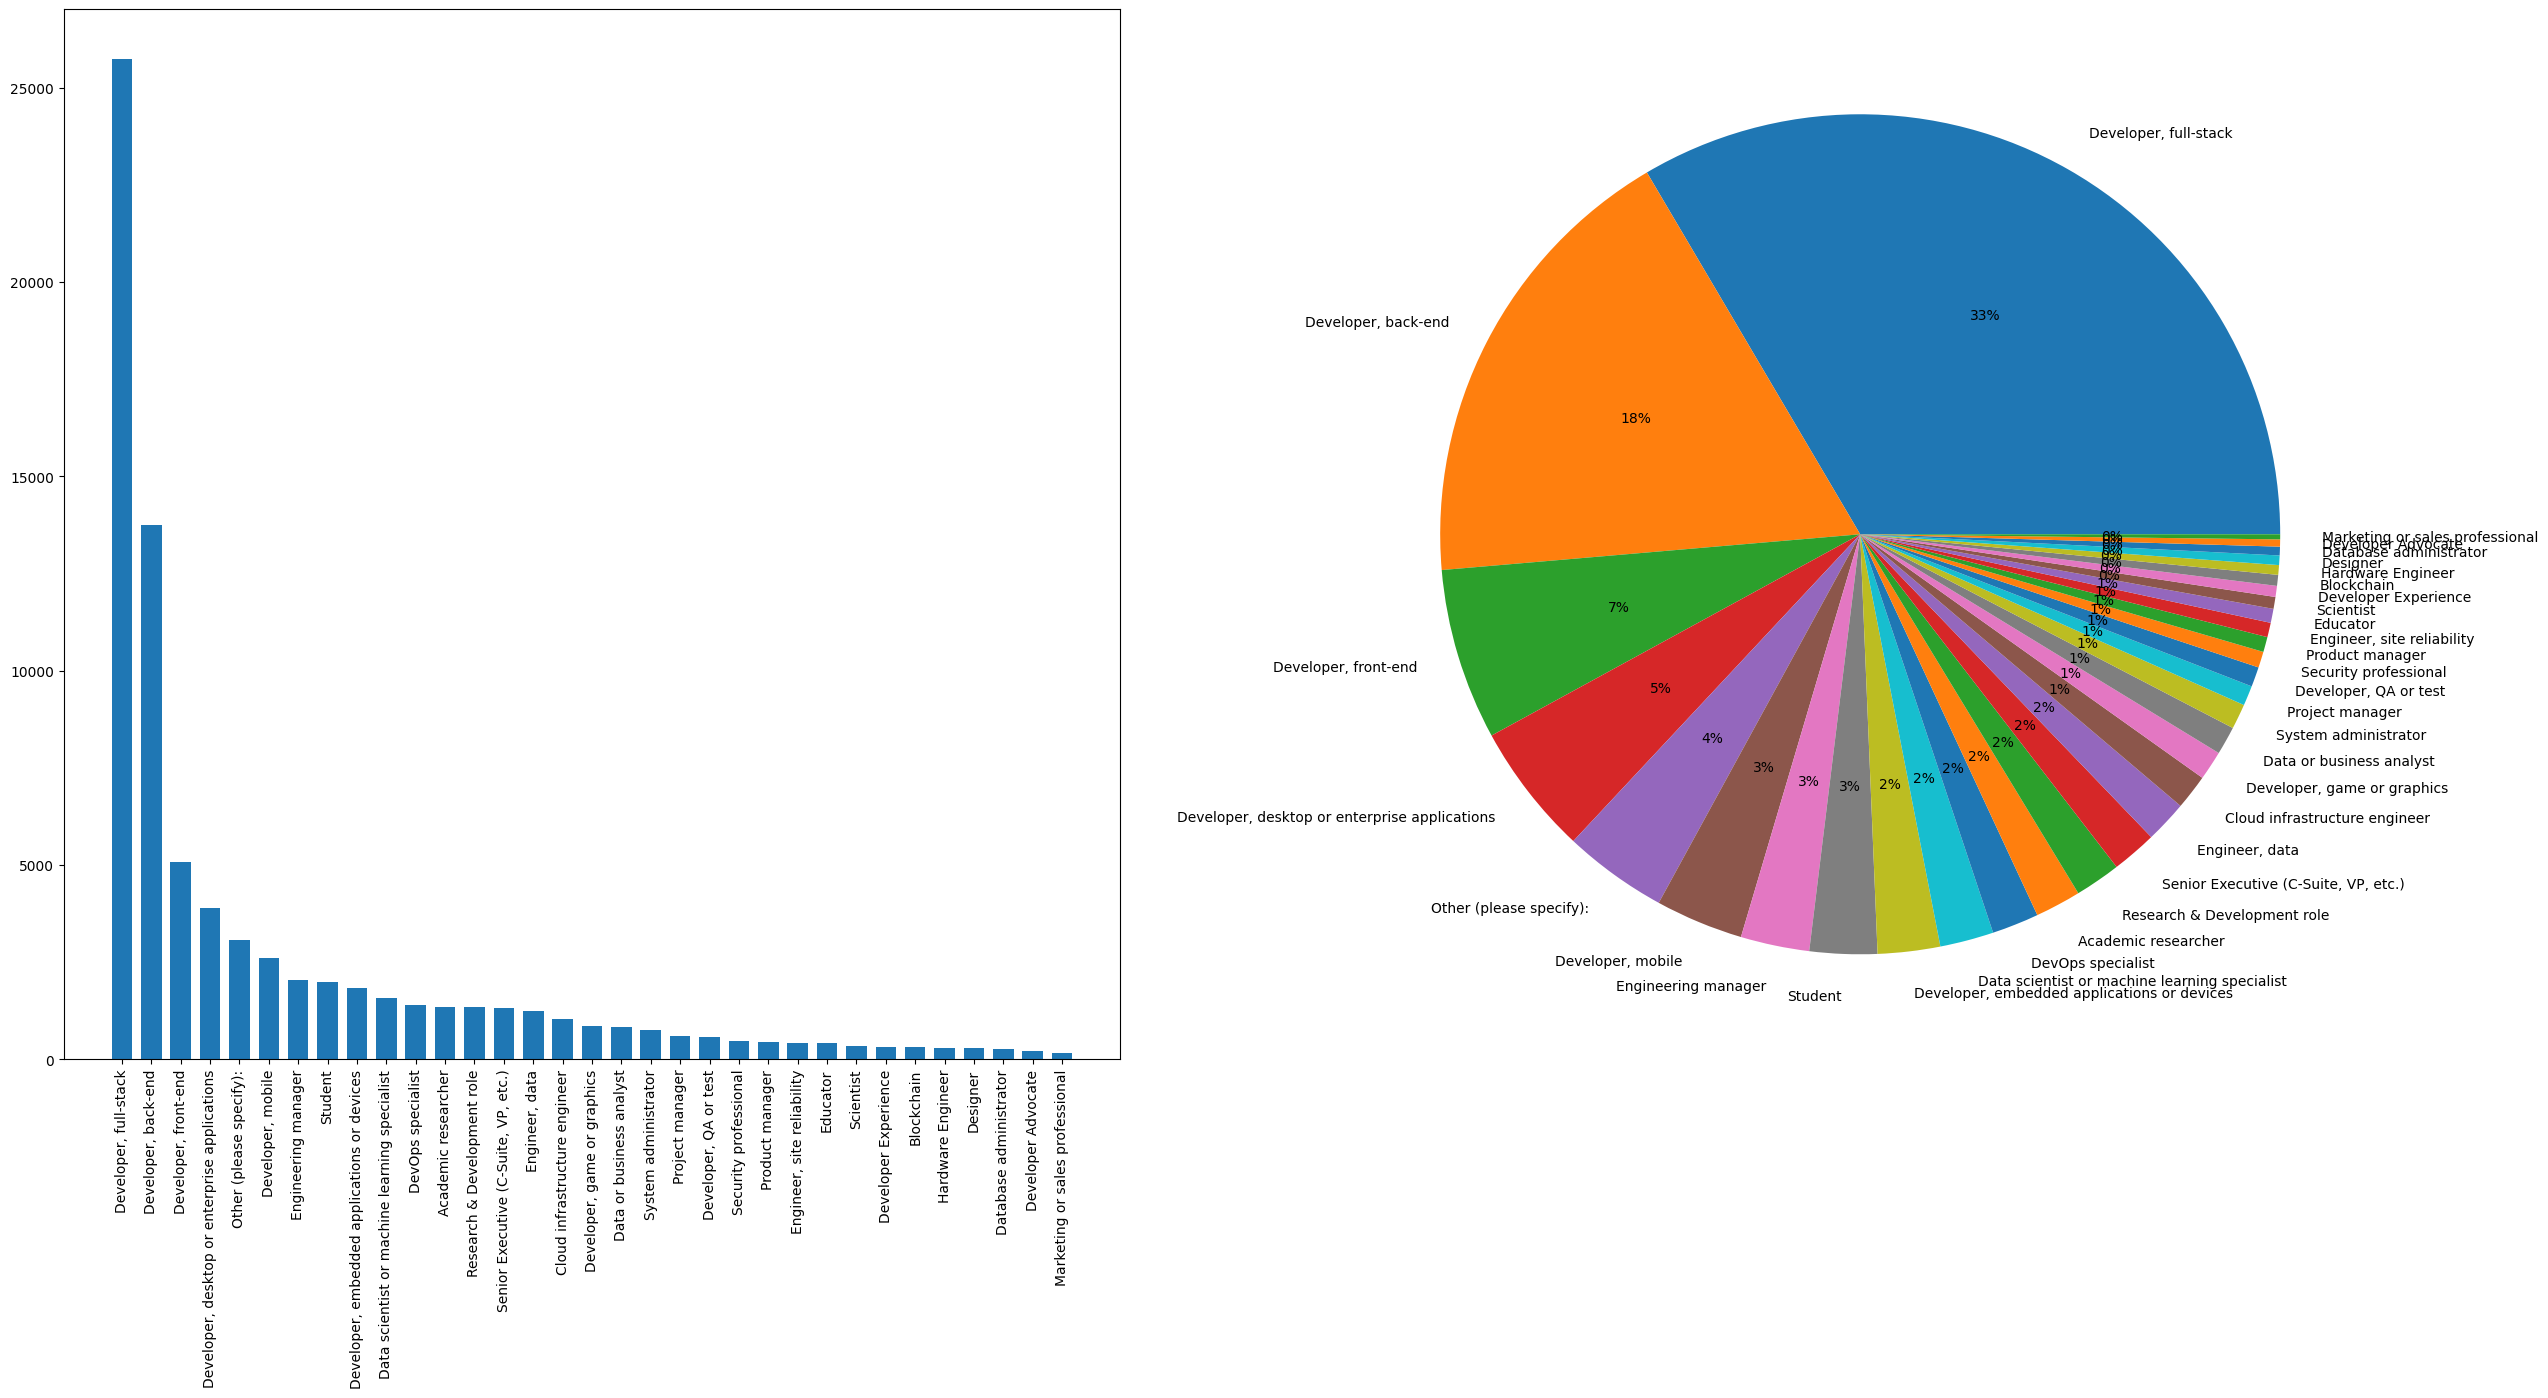

In [ ]:
dev_type = split_multicolumn(df["DevType"])
dev_type_sum = dev_type.sum().sort_values(ascending=False)
label = dev_type_sum.index
value = dev_type_sum.values

plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

# plt.subplot(2,2,3)
# sns.heatmap(dev_type.corr())

plt.show()

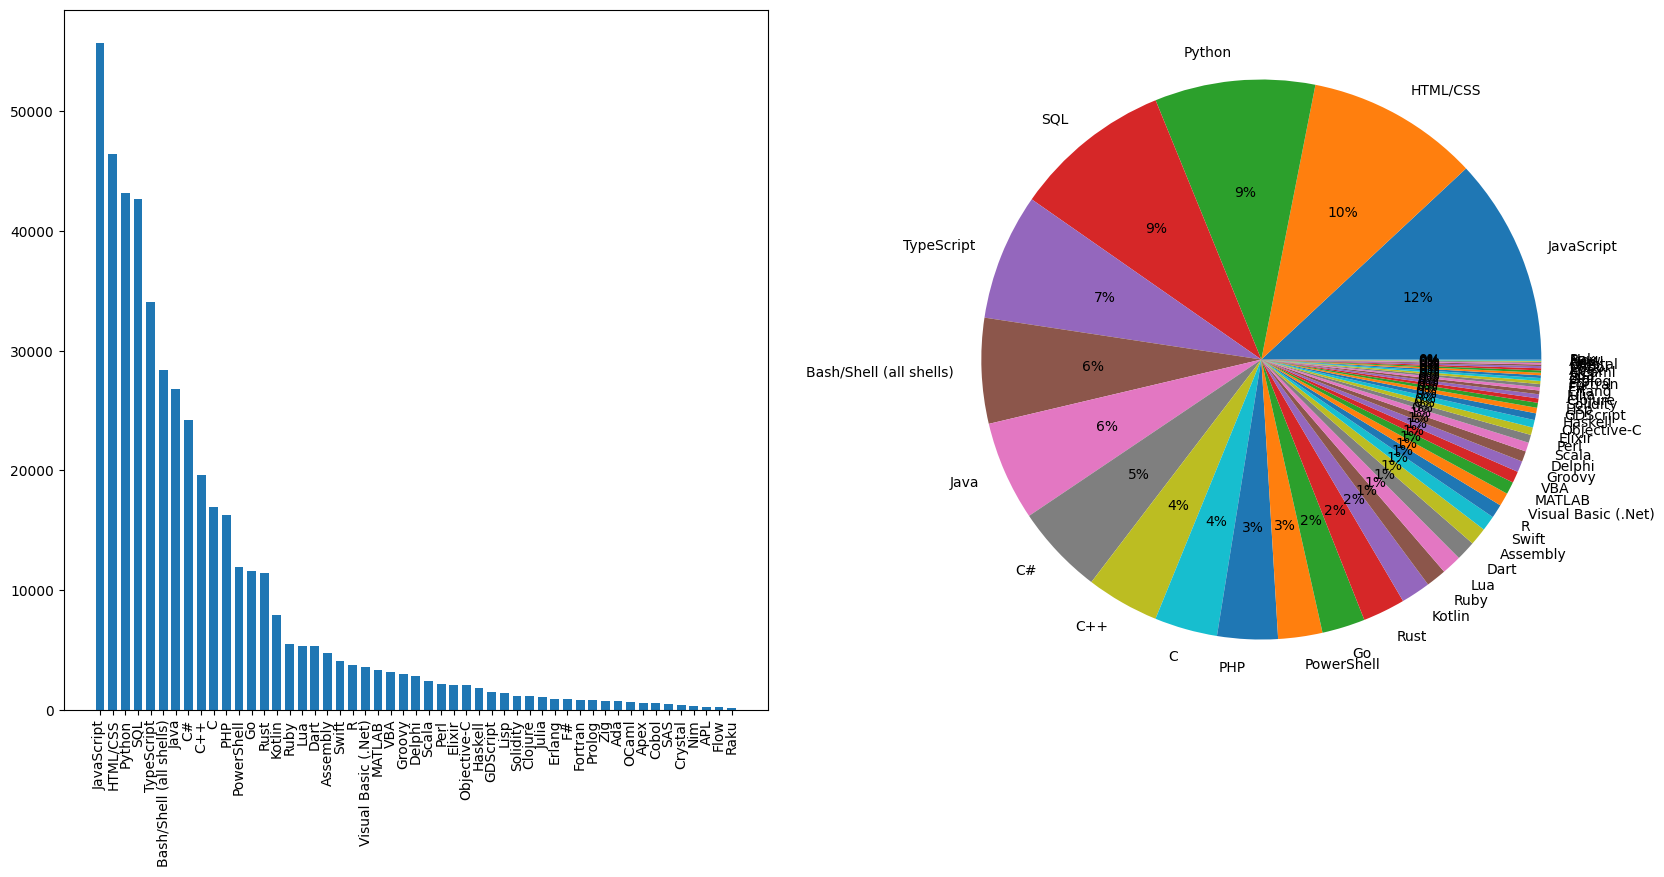

In [ ]:
language = split_multicolumn(df["LanguageHaveWorkedWith"])
language_sum = language.sum().sort_values(ascending=False)

label = language_sum.index
value = language_sum.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')
plt.show()

In [ ]:
import numpy as np
X = df_new.drop('Salary',axis=1)
Y = df_new['Salary']

In [ ]:
initial_model = RandomForestRegressor(n_estimators=100)
initial_model.fit(X, Y)

RandomForestRegressor()

In [ ]:
initial_feature_importances = initial_model.feature_importances_
initial_feature_names = X.columns

In [ ]:
initial_importance_df = pd.DataFrame({'Feature': initial_feature_names, 'Importance': initial_feature_importances})
initial_importance_df = initial_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
initial_importance_df

Feature    Importance
9                    CompTotal  6.480250e-01
0                      Country  3.164046e-01
2                 YearsCodePro  1.440344e-02
6                      WorkExp  7.354853e-03
8                   RemoteWork  1.633176e-03
..                         ...           ...
60                         Nim  9.558274e-09
69  DevType_Developer Advocate  2.197815e-09
25                       OCaml  1.963430e-09
92             DevType_Student  6.811748e-10
26                        Raku  0.000000e+00

[107 rows x 2 columns]

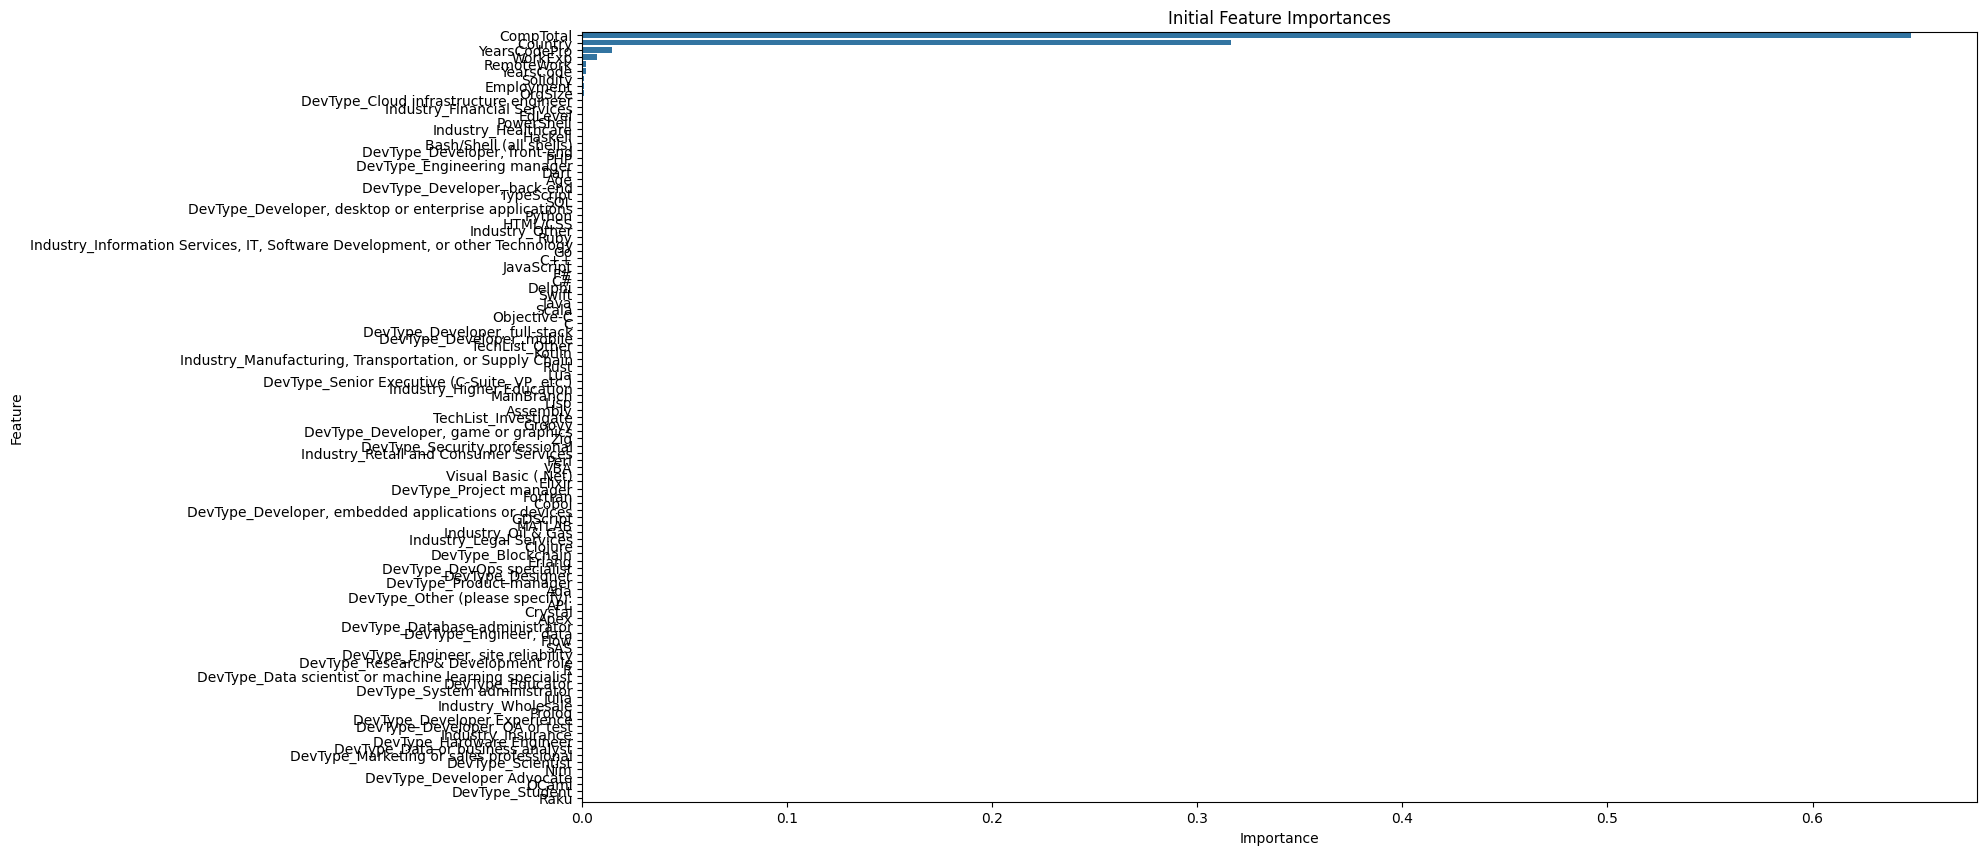

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x='Importance', y='Feature', data=initial_importance_df)
plt.title('Initial Feature Importances')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_reg.score(X_train,y_train)

0.30932268907035265

In [ ]:
linear_reg.score(X_test,y_test)

0.30723269748038917

In [ ]:
linear_reg.predict(X_test)

array([41646.50380546, 88021.33385579, 97807.20203216, ...,
       86768.70329428, 70409.77237011, 78903.02984698])

In [ ]:
models = {
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso(alpha=0.1)),
    ('Ridge Regression', Ridge(alpha=1)),
    ('Decision Tree', DecisionTreeRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=100)),
    ('AdaBoost', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100))
}

In [ ]:
r2_scores = []

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((name, r2))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


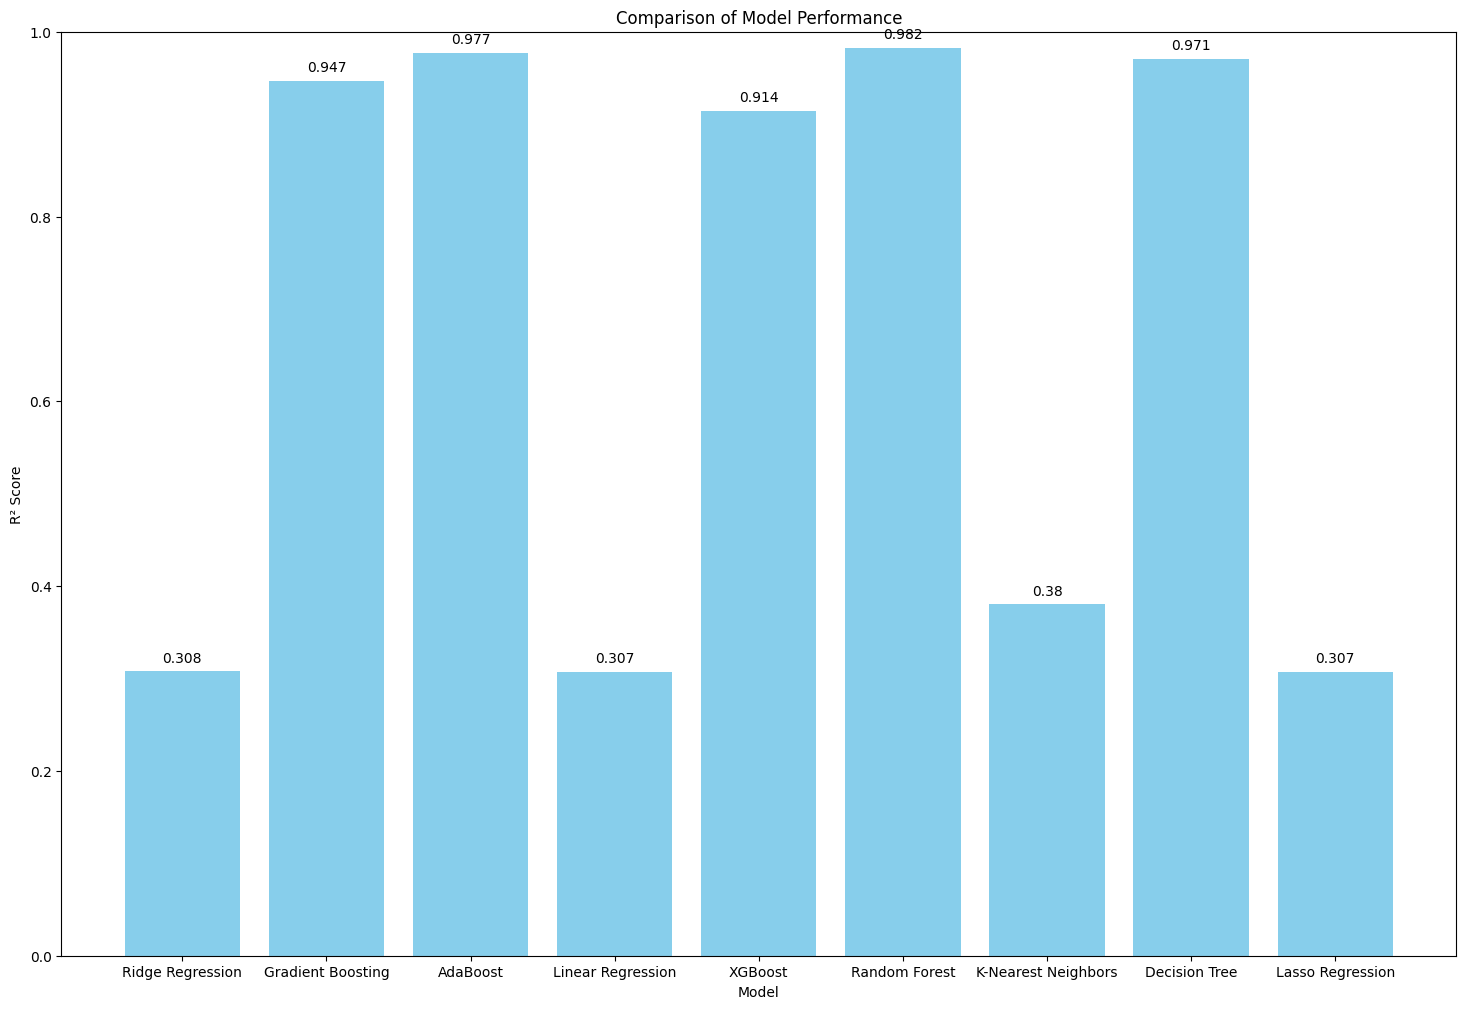

In [ ]:
model_names = [model[0] for model in r2_scores]
r2_values = [model[1] for model in r2_scores]

plt.figure(figsize=(18, 12))
plt.bar(model_names, r2_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of Model Performance')
plt.ylim(0, 1)
for i in range(len(model_names)):
    plt.text(i, r2_values[i] + 0.01, round(r2_values[i], 3), ha='center')
plt.show()

In [ ]:
classifiers = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100),
    "AdaBoost": AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)
}

In [ ]:
import time
from sklearn.metrics import mean_absolute_error

columns = ['Model', 'Run Time (minutes)', 'MAE', 'MSE', 'RMSE', 'R2']
df_models = pd.DataFrame(columns=columns)

# Loop through your regression models
for key, clf in classifiers.items():
    # STARTING TIME
    start_time = time.time()
    # TRAIN CLASSIFIER ON TRAINING DATA
    clf.fit(X_train, y_train)

    #SAVE THE TRAINED MODEL
    classifiers[key] = clf

    # MAKE PREDICTIONS USING CURRENT CLASSIFIER
    predictions = clf.predict(X_test)

    # CALCULATE REGRESSION METRICS
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)  # Calculate RMSE
    r2 = r2_score(y_test, predictions)

    row = {'Model': key,
           'Run Time (minutes)': round((time.time() - start_time) / 60, 2),
           'MAE': mae,
           'MSE': mse,
           'RMSE': rmse,
           'R2': r2
           }

    df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)

# Sort the DataFrame by R-squared (R2) in descending order
df_models = df_models.sort_values(by='R2', ascending=False)

# PRINT THE MODELS WITH REGRESSION METRICS [SORTED]
print(df_models)

<ipython-input-111-8c4d8813d96f>:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


                 Model  Run Time (minutes)           MAE           MSE  \
4        Random Forest                0.13    832.011062  2.190304e+07   
7              XGBoost                0.01   1879.688881  2.590497e+07   
8             AdaBoost                0.14    691.049068  2.795448e+07   
3        Decision Tree                0.01    833.477019  3.613417e+07   
5    Gradient Boosting                0.03   4489.529211  6.724871e+07   
6  K-Nearest Neighbors                0.00  21764.742981  7.810217e+08   
1                Ridge                0.00  23909.559242  8.724984e+08   
2                Lasso                0.03  23912.070228  8.727170e+08   
0    Linear Regression                0.00  23912.327089  8.731389e+08   

           RMSE        R2  
4   4680.068175  0.982622  
7   5089.692585  0.979446  
8   5287.199765  0.977820  
3   6011.170461  0.971330  
5   8200.531181  0.946643  
6  27946.765982  0.380320  
1  29538.084098  0.307741  
2  29541.783442  0.307567  
0  2954

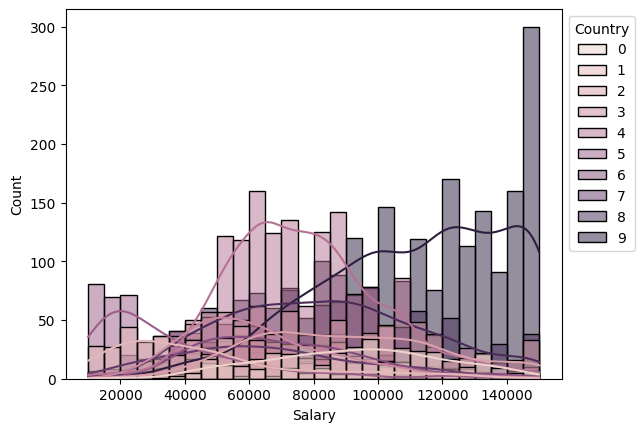

In [ ]:
ax = sns.histplot(data=df_new, x="Salary", hue="Country", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

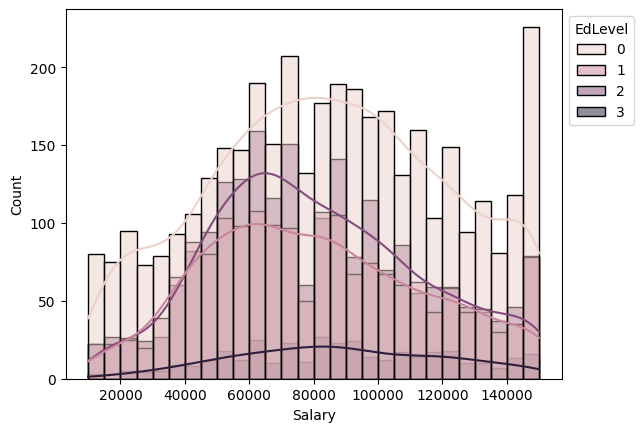

In [ ]:
ax = sns.histplot(data=df_new, x="Salary", hue="EdLevel", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

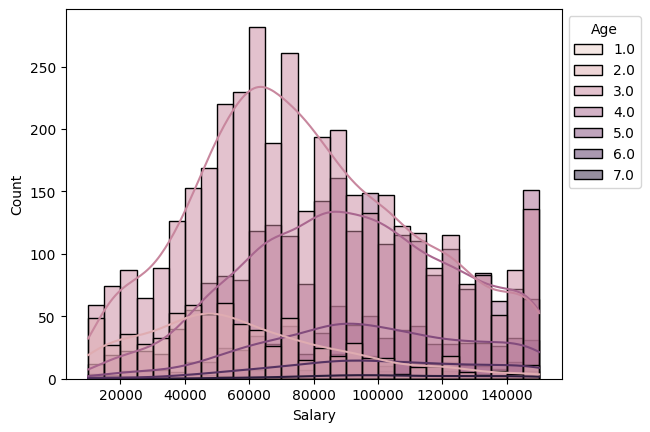

In [ ]:
ax = sns.histplot(data=df_new, x="Salary", hue="Age", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

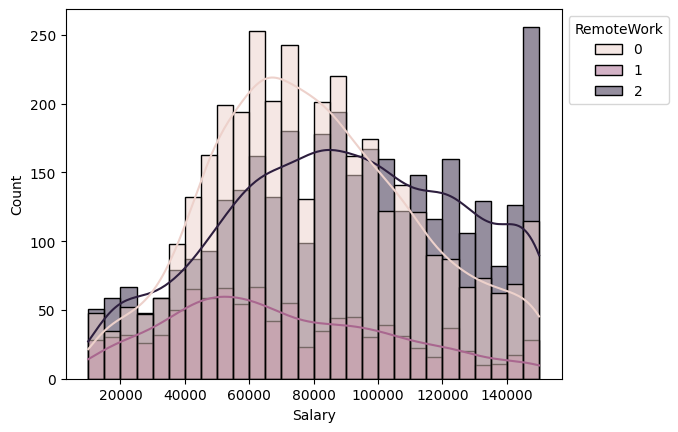

In [ ]:
ax = sns.histplot(data=df_new, x="Salary", hue="RemoteWork", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters: {'max_depth': 20, 'n_estimators': 300}


In [ ]:
prediction = grid_search.predict(X_test)

In [ ]:
random_r2 = r2_score(y_test, predictions)
print("Random Forest R^2 score after hyperparameter tuning = ", random_r2)

Random Forest R^2 score after hyperparameter tuning =  0.9778203100280242


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 827.2783294886221


In [ ]:
import joblib

# Save the model as a .pkl file
joblib.dump(best_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
# Check for New Sample Test Data

In [ ]:
# import pandas as pd
# import joblib
# model = joblib.load('random_forest_model.pkl')

In [ ]:
# test_data = {
#     'YearsCode': ['5-10 years', 'Less than 1 year'],
#     'YearsCodePro': ['3-5 years', '1-2 years'],
#     'EdLevel': ['Master’s degree', 'Bachelor’s degree'],
#     'WorkExp': [10.0, 5.0],
#     'RemoteWork': ['Remote', 'In-person'],
#     'Country': ['United States of America', 'India'],
#     'Employment': ['Employed, full-time', 'Employed, full-time'],
#     'MainBranch': ['I am a developer by profession', 'I am a developer by profession'],
#     'OrgSize': ['10,000 or more employees', '10 to 19 employees'],
#     'DevType': ['Data scientist or machine learning specialist', 'Data or business analyst'],
#     'Industry': ['Software Development', 'Software Development'],
#     'TechList': ['Given a list', 'Given a list'],
#     'LanguageHaveWorkedWith': ['Python; Java', 'JavaScript; Java'],
#     'Age': ['25-34 years old', '35-44 years old'],
#     'CompTotal': [120000, 80000]
# }
# df_test = pd.DataFrame(test_data)


In [ ]:
# def clean_YearsCodePro(x):
#     if x == 'More than 50 years':
#         return 51
#     if x == 'Less than 1 year':
#         return 0.5
#     # Handle ranges like '5-10 years'
#     if '-' in x:
#         parts = x.split('-')
#         return (float(parts[0]) + float(parts[1].replace(' years', ''))) / 2
#     return float(x.replace(' years', ''))
# def clean_education(x):
#     if 'Bachelor’s degree' in x:
#         return 'Bachelor’s degree'
#     if 'Master’s degree' in x:
#         return 'Master’s degree'
#     if 'Professional degree' in x or 'Other doctoral' in x:
#         return 'Post grad'
#     return 'Less than a Bachelors'
# def remote_work_process(val):
#     if val == 'Hybrid (some remote, some in-person)':
#         return "Hybrid"
#     elif val == 'Remote':
#         return "Remote"
#     else:
#         return "Person"
# age_map = {
#     'Under 18 years old': 1,
#     '18-24 years old': 2,
#     '25-34 years old': 3,
#     '35-44 years old': 4,
#     '45-54 years old': 5,
#     '55-64 years old': 6,
#     '65 years or older': 7
# }
# def split_multicolumn(col_series, all_options):
#     result_df = pd.DataFrame(0, index=col_series.index, columns=all_options)

#     for idx, value in col_series.dropna().items():
#         if isinstance(value, str):
#             for option in value.split(';'):
#                 option = option.strip()
#                 if option in all_options:
#                     result_df.at[idx, option] = 1
#         else:
#             print(f"Warning: Non-string value detected at index {idx}.")

#     result_df.fillna(0, inplace=True)

#     return result_df


In [ ]:
# df_test['YearsCode'] = df_test['YearsCode'].apply(clean_YearsCodePro)
# df_test['YearsCodePro'] = df_test['YearsCodePro'].apply(clean_YearsCodePro)
# df_test['EdLevel'] = df_test['EdLevel'].apply(clean_education)
# df_test['RemoteWork'] = df_test['RemoteWork'].apply(remote_work_process)
# for col in ['Country', 'EdLevel', 'Employment', 'RemoteWork', 'MainBranch', 'OrgSize']:
#     df_test[col] = label_encoders[col].transform(df_test[col].astype(str))
# # for col in label_encode_cols:
# #     le = label_encoders[col]
# #     test_df[col] = le.transform(test_df[col].astype(str))

# df_test = pd.get_dummies(df_test, columns=['DevType', 'Industry', 'TechList'], drop_first=True)

# # test_df = pd.get_dummies(test_df, columns=one_hot_encode_cols, drop_first=True)
# df_test['Age'] = df_test['Age'].replace(age_map)
# df_test['Age'] = pd.to_numeric(df_test['Age'], errors='coerce')
# df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

# all_languages = [
#     'HTML/CSS', 'JavaScript', 'Python', 'Bash/Shell (all shells)', 'Go', 'PHP',
#     'Ruby', 'SQL', 'TypeScript', 'Ada', 'Clojure', 'Elixir', 'Java', 'Lisp',
#     'OCaml', 'Raku', 'Scala', 'Swift', 'Zig', 'Rust', 'C#', 'PowerShell', 'C++',
#     'Kotlin', 'Solidity', 'C', 'Perl', 'Dart', 'Haskell', 'Assembly', 'Delphi',
#     'R', 'Lua', 'MATLAB', 'VBA', 'Visual Basic (.Net)', 'Julia', 'F#', 'Groovy',
#     'APL', 'Objective-C', 'GDScript', 'Crystal', 'Cobol', 'Fortran', 'Prolog',
#     'Erlang', 'Apex', 'SAS', 'Nim', 'Flow'
# ]


# test_processed = split_multicolumn(df_test['LanguageHaveWorkedWith'], all_languages)
# df_test.drop(columns=['LanguageHaveWorkedWith'], inplace=True)

# # Concatenate the new language columns to the test DataFrame
# df_test = pd.concat([df_test, test_processed], axis=1)
# # for col in df_new.columns:
# #     if col not in test_processed.columns:
# #         test_processed[col] = 0

# df_test['CompTotal'] = scaler.transform(df_test[['CompTotal']])

# train_columns = X_train.columns
# for col in train_columns:
#     if col not in df.columns:
#         df_test[col] = 0
# df_test = df_test[train_columns]

# print(df_test.head())

   Country  EdLevel  YearsCodePro  Employment  Age  YearsCode  WorkExp  \
0        9        2           4.0           0    3        7.5     10.0   
1        5        0           1.5           0    4        0.5      5.0   

   MainBranch  RemoteWork  CompTotal  ...  \
0           0           2  -0.169131  ...   
1           0           1  -0.216172  ...   

   Industry_Information Services, IT, Software Development, or other Technology  \
0                                                  0                              
1                                                  0                              

   Industry_Insurance  Industry_Legal Services  \
0                   0                        0   
1                   0                        0   

   Industry_Manufacturing, Transportation, or Supply Chain  \
0                                                  0         
1                                                  0         

   Industry_Oil & Gas  Industry_Other  Industry_Retai

In [ ]:
# X_test = df_test
# y_test = [120000, 60000]

In [ ]:
# model = joblib.load('random_forest_model.pkl')

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# y_pred

array([120000.        ,  85706.95666667])

In [ ]:
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f"R² Score: {r2}")
# print(f"Mean Squared Error: {mse}")

R² Score: 0.6328624327434013
Mean Squared Error: 330423810.53093886
